## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance. 

## Section 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
!pip install imblearn
from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [2]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data 
train_data = pd.read_csv('SalaryData_Train.csv')
# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data 
test_data = pd.read_csv('SalaryData_Test.csv')
# TODO: Display the first 5 or 10 rows of the train_data dataframe
train_data.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## Section 3. EDA

In [3]:
# TODO: Print the shape of the train_data dataframe
print(train_data.shape)
# TODO: Print the shape of the test_data dataframe
print(test_data.shape)
# TODO: Print the information about the train_data dataframe  
print(train_data.info())
# TODO Display the summary statistics of the train_data dataframe 
print(train_data.describe())
# TODO: Replace any NaN values in the train_data dataframe with 0 
train_data[train_data.isnull().any(axis=1)] = 0
# TODO: Print the number of NaN values in each column of the train_data dataframe
print(train_data.isnull().sum())

(30161, 14)
(15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None
                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000 

## Data Visualization

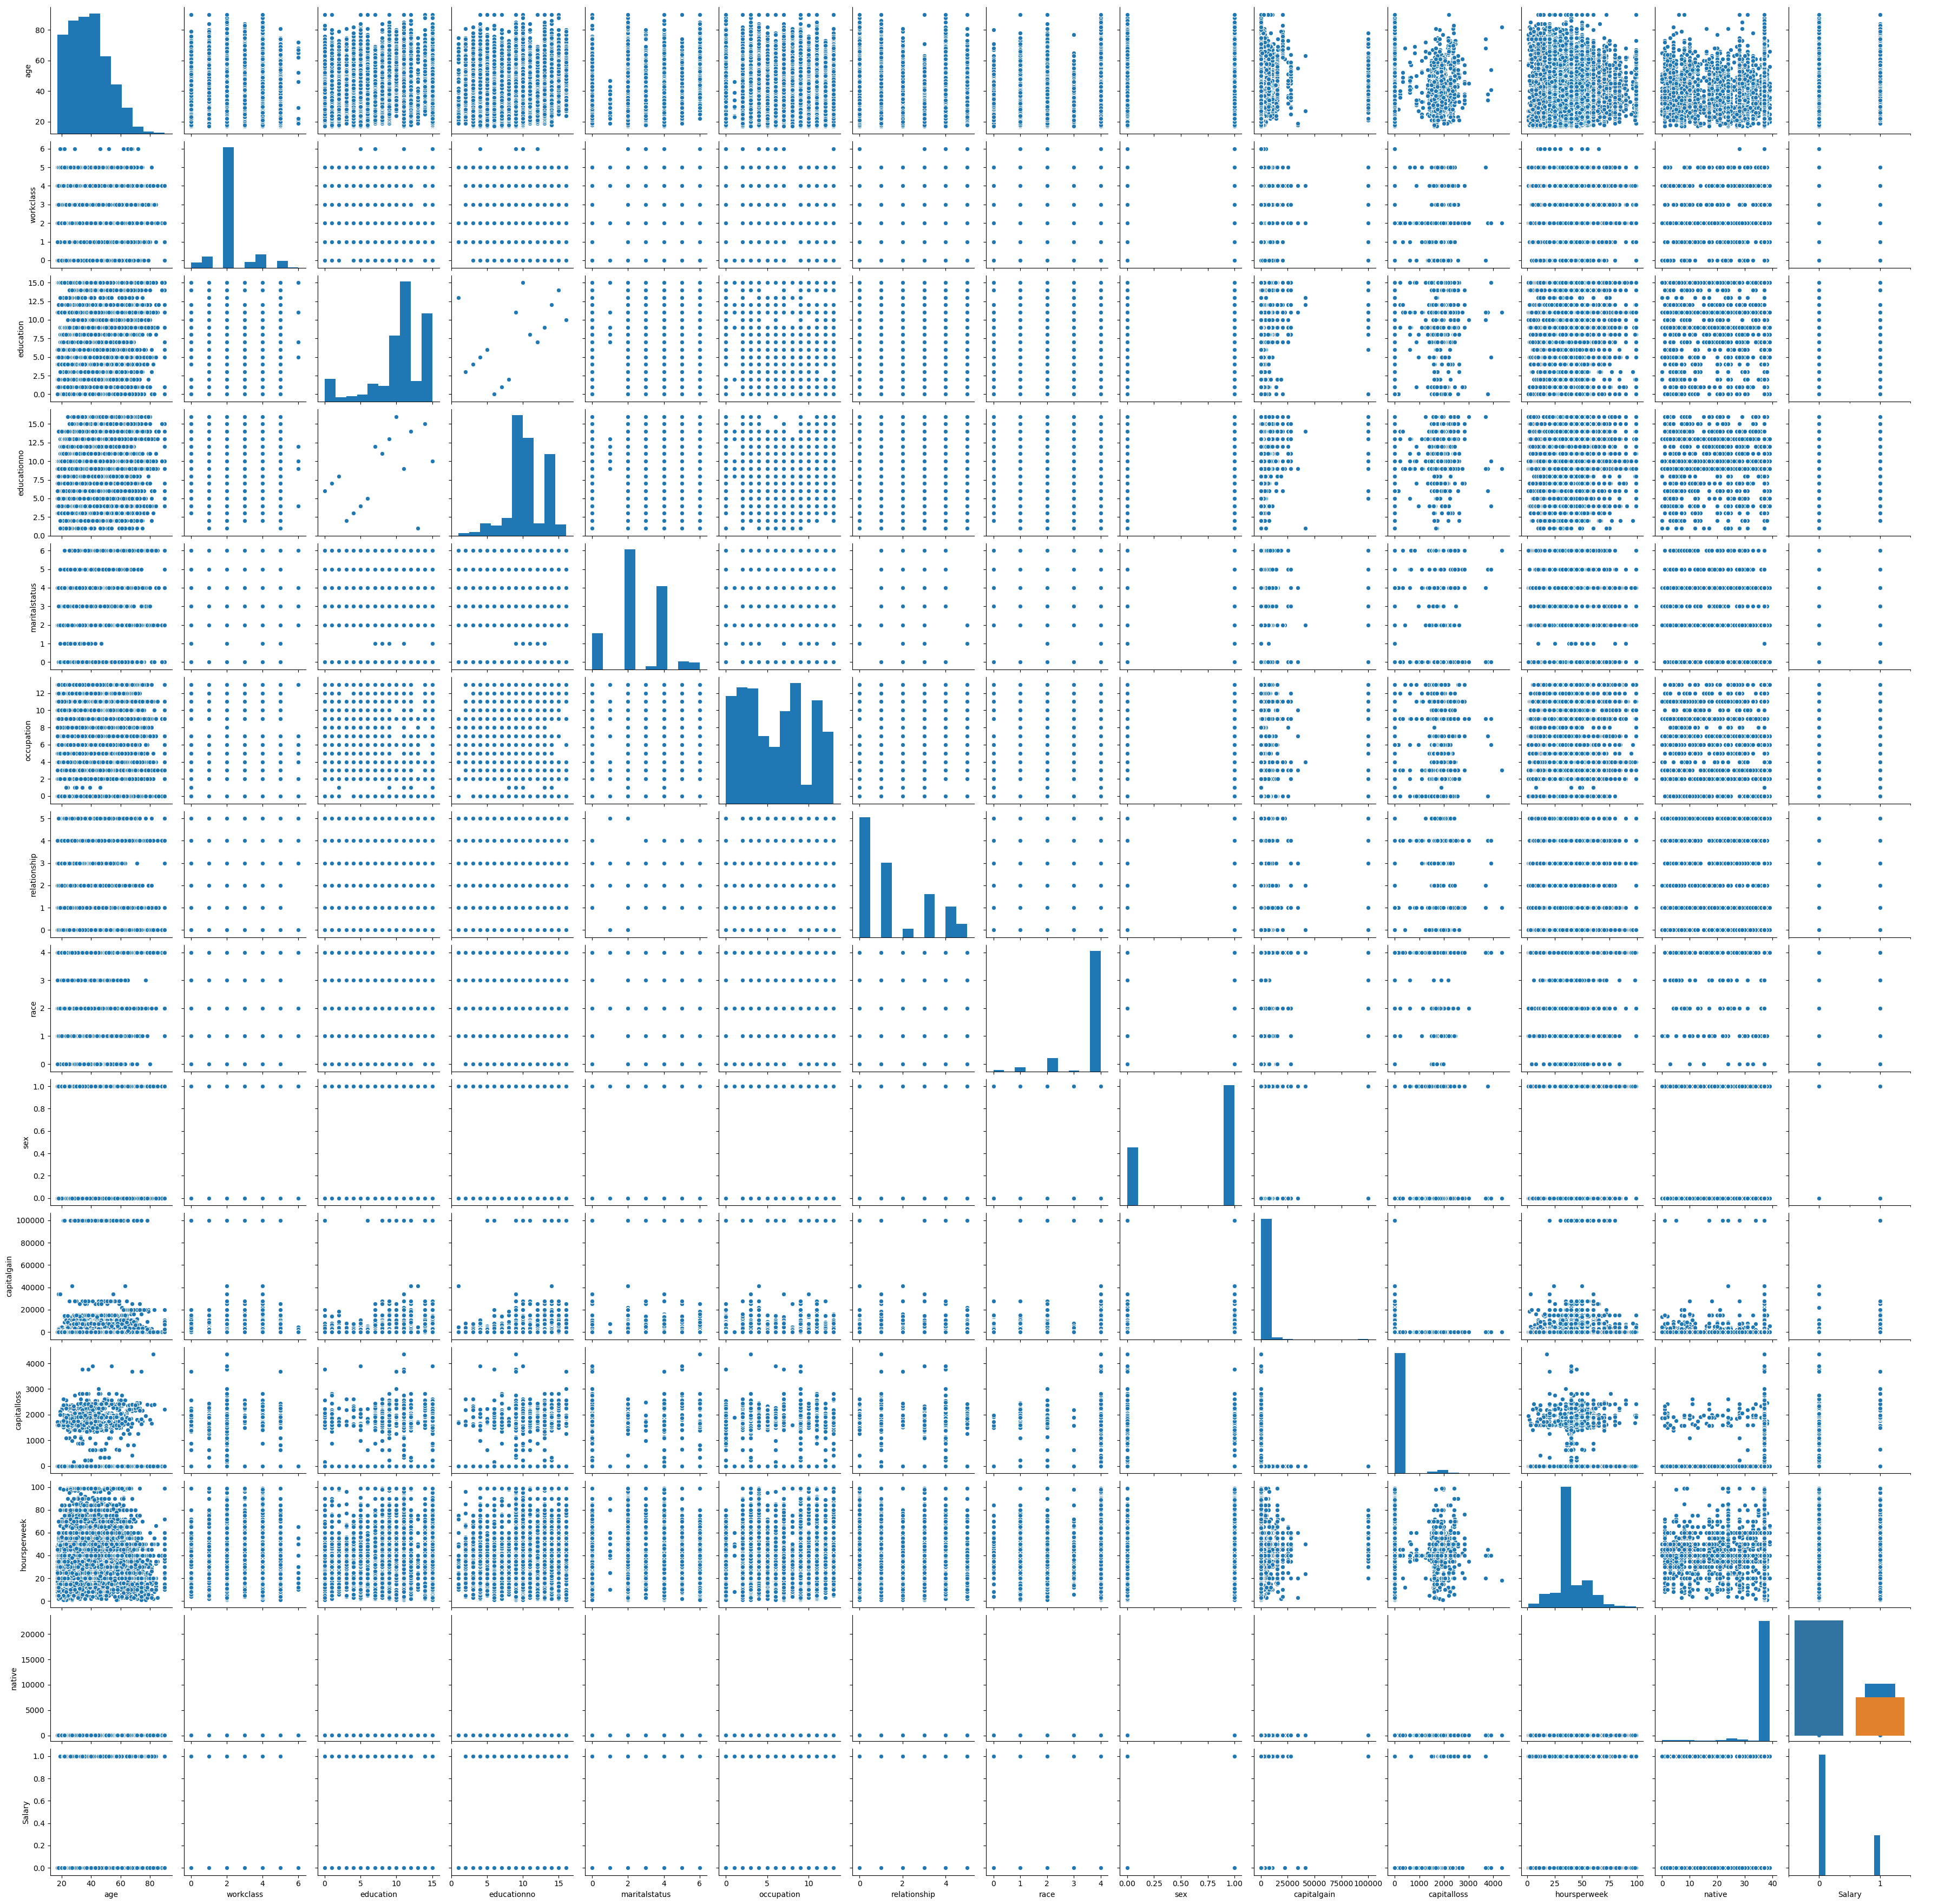

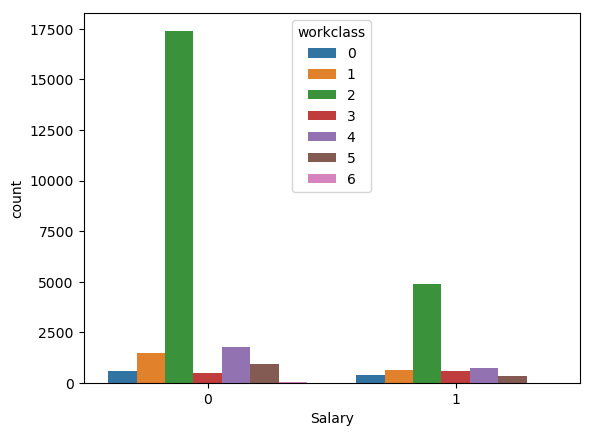

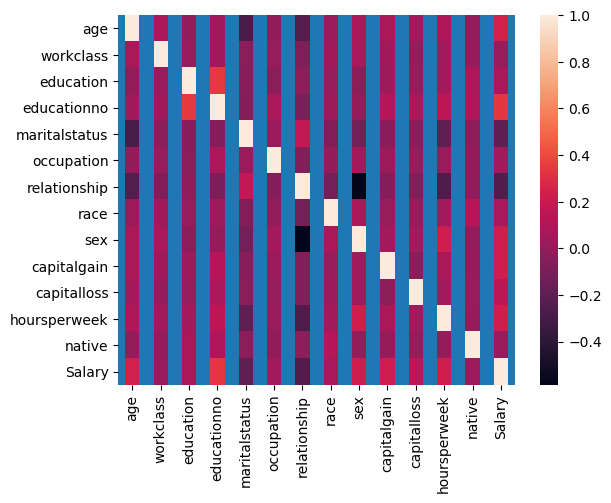

In [18]:
# TODO: Display pairwise relationships between variables in the train_data dataframe 
sns.pairplot(train_data)
# TODO: Plot the average count of males and females in each salary group using a bar plot
pd.crosstab(train_data['Salary'],train_data['sex']).mean().plot(kind='bar')
# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
sns.countplot(x='Salary',data= train_data)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
# TODO: Plot the count of each salary group in each workclass using a bar plot
sns.countplot(x='Salary',data= train_data, hue='workclass')
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()

# TODO: Plot the average count of each education level in each salary group using a bar plot
pd.crosstab(train_data['Salary'],train_data['education']).mean().plot(kind='bar')
# TODO: Plot the average count of each occupation in each salary group using a bar plot
pd.crosstab(train_data['Salary'],train_data['occupation']).mean().plot(kind='bar')
# TODO: Plot the average count of each workclass in each salary group using a bar plot
pd.crosstab(train_data['Salary'],train_data['workclass']).mean().plot(kind='bar')
# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap
corr = train_data.corr()
sns.heatmap(corr)
plt.show()

###  Outliers Detection

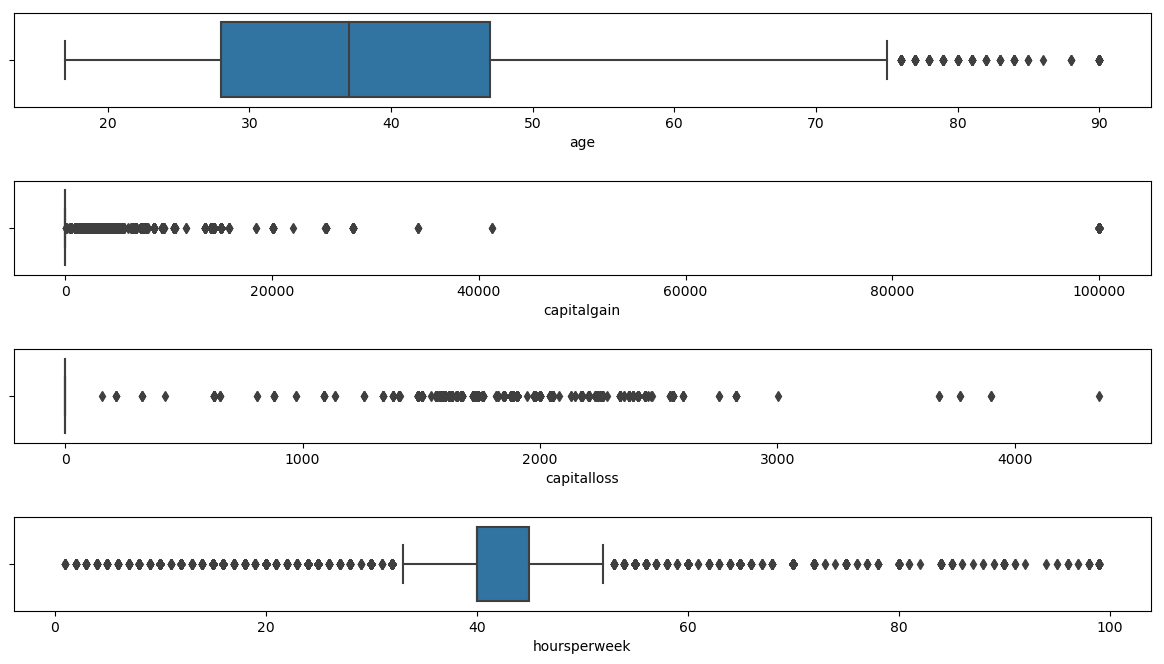

In [7]:
outlier1 = train_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,ax=axes[3])
plt.tight_layout(pad=2.0)

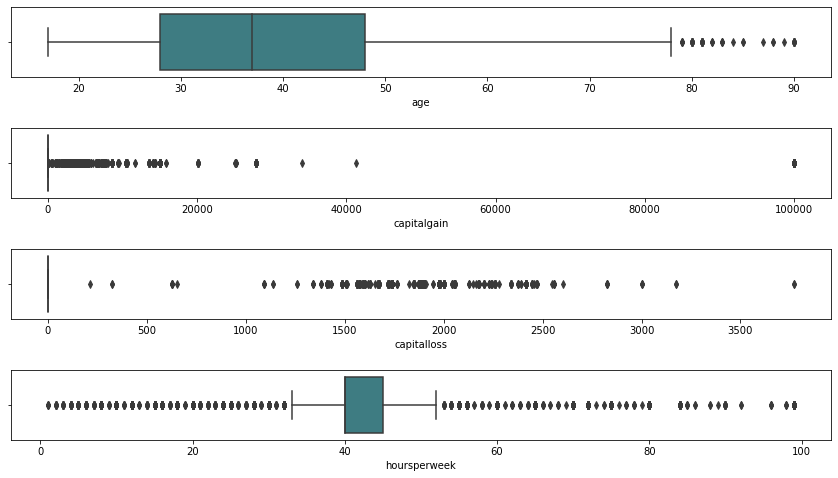

In [ ]:
outlier2 = test_data.copy() 
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [4]:
# TODO: Create a LabelEncoder object
number = LabelEncoder()
# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:
string_columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
# workclass, education, maritalstatus, occupation, relationship, race, sex, native
for i in string_columns:
        train_data[i]= number.fit_transform(train_data[i])
        test_data[i]=number.fit_transform(test_data[i])
# TODO: Display the modified train_data dataframe
print(train_data.head())
# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
train_data['Salary'] = number.fit_transform(train_data['Salary'])
# TODO: Do the same preprocessing to test data
test_data['Salary'] = number.fit_transform(test_data['Salary'])
print(test_data.head())

   age  workclass  education  educationno  maritalstatus  occupation  \
0   39          5          9           13              4           0   
1   50          4          9           13              2           3   
2   38          2         11            9              0           5   
3   53          2          1            7              2           5   
4   28          2          9           13              2           9   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek  native  \
0             1     4    1         2174            0            40      37   
1             0     4    1            0            0            13      37   
2             1     4    1            0            0            40      37   
3             0     2    1            0            0            40      37   
4             5     2    0            0            0            40       4   

   Salary  
0   <=50K  
1   <=50K  
2   <=50K  
3   <=50K  
4   <=50K  
   age  workclass  educati

## Section 5. Model Building

In [5]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
colnames = train_data.columns
X_train = train_data[colnames[0:13]]
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data[colnames[13]]
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data[colnames[0:13]]
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data[colnames[13]]
# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print("X_train shape: \n",X_train.shape)
print("y_train shape: \n",y_train.shape)
print("X_test shape: \n",X_test.shape)
print("y_test shape: \n",y_test.shape)
# TODO: Create a Support Vector Classifier object
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
X_train = norm_func(X_train)
X_test =  norm_func(X_test)
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)

X_train shape: 
 (30161, 13)
y_train shape: 
 (30161,)
X_test shape: 
 (15060, 13)
y_test shape: 
 (15060,)


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [6]:
# TODO: Train the svc model with X_train and y_train 
model_linear.fit(X_train,y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = model_linear.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
# TODO: Print the classification report of y_test and y_pred
print(classification_report(y_test,y_pred))
# TODO: Print the training accuracy of the svc model with X_train and y_train 
y_pred_train = model_linear.predict(X_train)
print(np.mean(y_pred_train==y_train))
# TODO: Print the testing accuracy of the svc model with X_test and y_test 
print(np.mean(y_pred==y_test))

[[11003   357]
 [ 2509  1191]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     11360
           1       0.77      0.32      0.45      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.65      0.67     15060
weighted avg       0.80      0.81      0.78     15060

0.8122741288418819
0.8096945551128818


## Section 7. Handling Imbalance Data

In [7]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
print(train_data['Salary'].nunique())
# TODO: Create a SMOTE object
sm = SMOTE(random_state=42)
# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
# TODO: Display the resampled X_resampled dataframe
print(X_resampled.head())
# TODO: Display the resampled y_resampled dataframe
print(y_resampled.head())
# TODO: Print the count of each unique value in the resampled y_resampled dataframe
print(y_resampled.nunique())

2
        age  workclass  education  educationno  maritalstatus  occupation  \
0  0.301370   0.833333   0.600000     0.800000       0.666667    0.000000   
1  0.452055   0.666667   0.600000     0.800000       0.333333    0.230769   
2  0.287671   0.333333   0.733333     0.533333       0.000000    0.384615   
3  0.493151   0.333333   0.066667     0.400000       0.333333    0.384615   
4  0.150685   0.333333   0.600000     0.800000       0.333333    0.692308   

   relationship  race  sex  capitalgain  capitalloss  hoursperweek    native  
0           0.2   1.0  1.0      0.02174          0.0      0.397959  0.948718  
1           0.0   1.0  1.0      0.00000          0.0      0.122449  0.948718  
2           0.2   1.0  1.0      0.00000          0.0      0.397959  0.948718  
3           0.0   0.5  1.0      0.00000          0.0      0.397959  0.948718  
4           1.0   0.5  0.0      0.00000          0.0      0.397959  0.102564  
0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [8]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
model_rbf = SVC(kernel = "linear",random_state=40,gamma=0.01,C=10.0)
# TODO: Train the model with resampled X and y dataframes as arguments
model_rbf.fit(X_resampled,y_resampled)
# TODO: Use the model to predict the values of y for X_test and store the result in y_pred
y_pred = model_rbf.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
# TODO: Print the classification report of y_test and y_pred
print(classification_report(y_test,y_pred))
# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments
y_pred_resampled = model_linear.predict(X_resampled)
print(np.mean(y_pred_resampled==y_resampled))
# TODO: Print the testing accuracy of the model with X_test and y_test as arguments
print(np.mean(y_pred==y_test))

[[8460 2900]
 [ 813 2887]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82     11360
           1       0.50      0.78      0.61      3700

    accuracy                           0.75     15060
   macro avg       0.71      0.76      0.71     15060
weighted avg       0.81      0.75      0.77     15060

0.6430936299827837
0.753452855245684


## Section 8. Feature Selection

In [9]:
def select_features(X_train, y_train, X_test):

    # TODO: Create a SelectKBest object with chi2 as the score function
    feature_selector = SelectKBest(chi2,k=X_train.shape[1])
    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object
    feature_selector = feature_selector.fit(X_train,y_train)
    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs = feature_selector.transform(X_train)
    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs = feature_selector.transform(X_test)
    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs , feature_selector

[1.94701587e+02 6.76876876e-01 1.76543871e+01 1.61142239e+02
 1.63704610e+02 1.68151829e+01 6.87076546e+02 7.33488386e+00
 4.59219298e+02 7.41254036e+02 2.88977449e+02 5.82516690e+01
 4.28392820e-01]


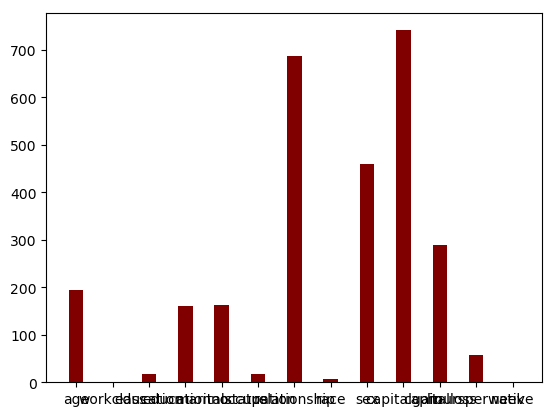

In [10]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_fs , X_test_fs, fs = select_features(X_train,y_train,X_test)
# TODO: print the corresponding score of each feature using scores_ attribute of the fs object
print(fs.scores_)
# TODO: Create a bar plot of the scores
plt.figure()
plt.bar(fs.feature_names_in_, fs.scores_, color ='maroon',
        width = 0.4)
# TODO: Display the bar plot 
plt.show()
# TODO Pick out the most relevant features
fs_index = np.argsort(fs.scores_)[::-1][:4]
feature_name = fs.feature_names_in_[fs_index]

In [11]:
# TODO: Create a copy of the train_data dataframe called train_data_copy 
train_data_copy = train_data.copy()

# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe 
train_data_copy = train_data_copy[feature_name]
# TODO: Display the train_data_copy dataframe
print(train_data_copy.head())
# TODO: Do the same to the test_data
test_data_copy = test_data.copy()
test_data_copy = test_data_copy[feature_name]
print(test_data_copy.head())

   capitalgain  relationship  sex  capitalloss
0         2174             1    1            0
1            0             0    1            0
2            0             1    1            0
3            0             0    1            0
4            0             5    0            0
   capitalgain  relationship  sex  capitalloss
0            0             3    1            0
1            0             0    1            0
2            0             0    1            0
3         7688             0    1            0
4            0             1    1            0


## Section 9. Model Training with Highly Relevant Features


In [14]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed
X_train = train_data_copy[:]
X_test = test_data_copy[:]
X_train = norm_func(X_train)
X_test =  norm_func(X_test)
model_linear = SVC(kernel = "rbf",random_state=40,gamma=0.01,C=1.0)
# TODO: Train the svc model with X_train and y_train 
model_linear.fit(X_train,y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = model_linear.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
# TODO: Print the classification report of y_test and y_pred
print(classification_report(y_test,y_pred))
# TODO: Print the training accuracy of the svc model with X_train and y_train 
y_pred_train = model_linear.predict(X_train)
print(np.mean(y_pred_train==y_train))
# TODO: Print the testing accuracy of the svc model with X_test and y_test 
print(np.mean(y_pred==y_test))

[[11358     2]
 [ 3619    81]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     11360
           1       0.98      0.02      0.04      3700

    accuracy                           0.76     15060
   macro avg       0.87      0.51      0.45     15060
weighted avg       0.81      0.76      0.66     15060

0.7559431053347038
0.7595617529880478
